In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\souvi\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
from pmdarima import auto_arima

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
cvd19_confirmed = pd.read_csv('confirmed.csv', index_col='Date', parse_dates=True)[8:]
cvd19_confirmed.index.freq = 'D'
cvd19_confirmed.head()

,Unnamed: 0,India
Date,,
2020-01-30,8,1
2020-01-31,9,1
2020-02-01,10,1
2020-02-02,11,2
2020-02-03,12,3


In [5]:
cvd19_confirmed = cvd19_confirmed.drop('Unnamed: 0', axis=1)

In [14]:
type(cvd19_confirmed)

pandas.core.frame.DataFrame

In [7]:
pmd = auto_arima(cvd19_confirmed['India'], seasonal=False, trace=True)

Fit ARIMA: order=(2, 2, 2); AIC=1858.172, BIC=1875.189, Fit time=0.955 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1876.018, BIC=1881.691, Fit time=0.000 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1855.294, BIC=1863.803, Fit time=0.078 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1855.704, BIC=1864.213, Fit time=0.089 seconds
Fit ARIMA: order=(2, 2, 0); AIC=1855.225, BIC=1866.570, Fit time=0.164 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1857.049, BIC=1871.231, Fit time=0.355 seconds
Fit ARIMA: order=(3, 2, 1); AIC=1855.947, BIC=1872.965, Fit time=0.583 seconds
Fit ARIMA: order=(3, 2, 0); AIC=1856.765, BIC=1870.946, Fit time=0.209 seconds
Total fit time: 3.093 seconds


In [8]:
pmd.get_params()

{'callback': None,
 'disp': 0,
 'maxiter': 50,
 'method': None,
 'order': (2, 2, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': None,
 'solver': 'lbfgs',
 'start_params': None,
 'suppress_warnings': False,
 'transparams': True,
 'trend': None,
 'with_intercept': True}

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
def performARIMA(dataset, future=10):
    pmd = auto_arima(dataset['India'], seasonal=False)
    optimal = pmd.get_params()['order']
    model=ARIMA(dataset['India'], order=optimal)
    print('Order =', optimal)
    fit = model.fit()
    future_pred = pd.DataFrame()
    future_pred['India'] = fit.predict(start=2, end=len(dataset)+future, typ='levels')
    return future_pred

In [30]:
# predicted = pd.DataFrame()
predicted = cvd19_confirmed.copy(deep=True).dropna()
# print(type(predicted))
for i in range(3):
    print('Pass', i)
    temp = performARIMA(predicted, future=10).dropna()
    predicted = temp.copy(deep=True)

print(predicted.tail(30))

Pass 0
Order = (2, 2, 0)
Pass 1
Order = (0, 2, 1)
Pass 2
Order = (1, 2, 2)
                    India
2020-06-09  276090.693747
2020-06-10  286146.902218
2020-06-11  296271.404702
2020-06-12  306443.132117
2020-06-13  316671.854860
2020-06-14  326962.012871
2020-06-15  337316.821201
2020-06-16  347740.549194
2020-06-17  358236.667415
2020-06-18  368808.233294
2020-06-19  379463.477434
2020-06-20  390200.550165
2020-06-21  401021.025495
2020-06-22  411926.010022
2020-06-23  422916.187101
2020-06-24  433991.868266
2020-06-25  445153.048763
2020-06-26  456399.464462
2020-06-27  467730.647861
2020-06-28  479145.981338
2020-06-29  490515.526181
2020-06-30  501940.645513
2020-07-01  513421.862577
2020-07-02  524959.677587
2020-07-03  536554.568749
2020-07-04  548206.993223
2020-07-05  559917.388054
2020-07-06  571686.171053
2020-07-07  583513.741647
2020-07-08  595400.481686


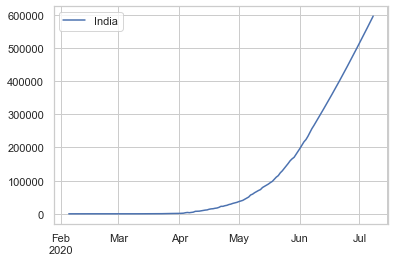

In [31]:
predicted.plot()